In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
data = pd.read_csv("../../runs/v6.csv")

<AxesSubplot:xlabel='true_state.time', ylabel='value'>

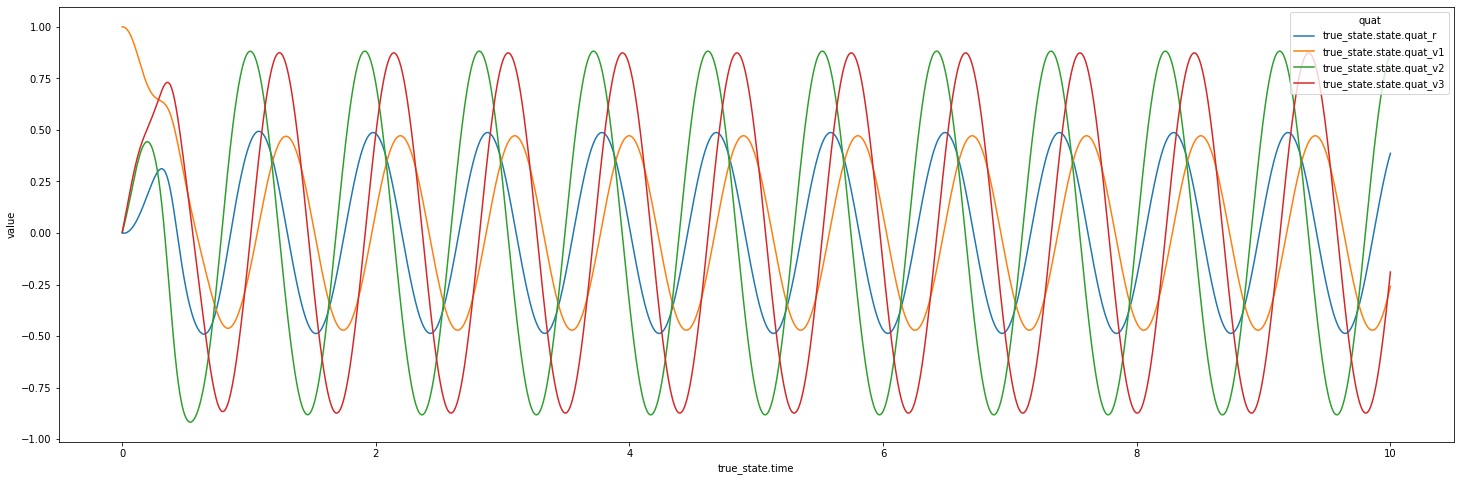

In [27]:
df = data[["true_state.time", "true_state.state.quat_r", "true_state.state.quat_v1","true_state.state.quat_v2", "true_state.state.quat_v3"]]
melted = pd.melt(df, id_vars=['true_state.time'], var_name="quat")
plt.figure(figsize=(25,8))

sns.lineplot(data=melted, x='true_state.time', y="value", hue="quat") 


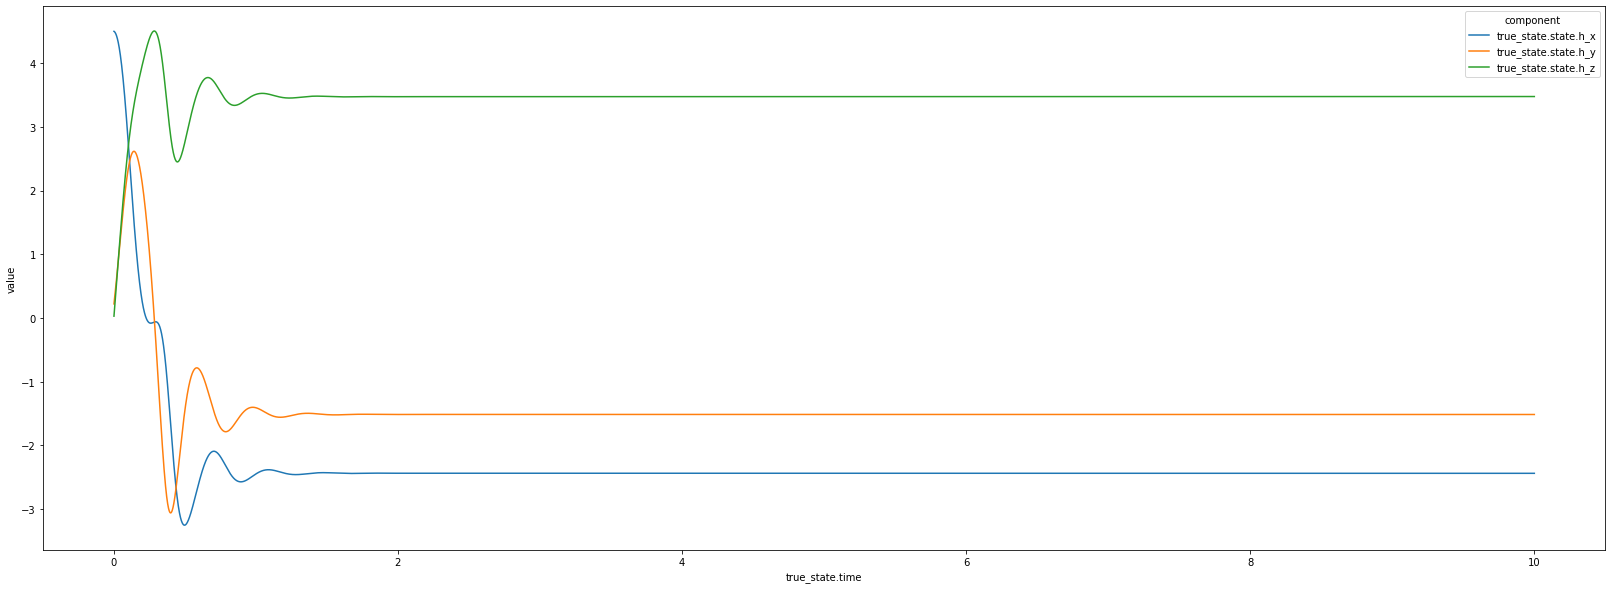

In [28]:
momentum_df = data[["true_state.time", "true_state.state.h_x", "true_state.state.h_y","true_state.state.h_z"]]
def magnitude(x, y, z):
    return (x**2 + y**2 + z**2)

# apply the magnitude function to each row of the dataframe to create a new column
# momentum_df['magnitude'] = momentum_df.apply(lambda row: magnitude(row['true_state.state.h_x'], row['true_state.state.h_y'], row['true_state.state.h_z']), axis=1)

melted = pd.melt(momentum_df, id_vars=['true_state.time'], var_name="component")
plt.figure(figsize=(28,10))
ax = sns.lineplot(data=melted, x='true_state.time', y="value", hue="component")


In [13]:
# code directly ripped from ChatGPT, thx:

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

# Define the number of time steps and the maximum length of the vectors
num_steps = len(momentum_df)
max_length = np.sqrt(momentum_df['true_state.state.h_x']**2 + momentum_df['true_state.state.h_y']**2 + momentum_df['true_state.state.h_z']**2).max()

# Create figure and axis objects
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.set_xlim([-3,3])
ax.set_ylim([-3,3])
ax.set_zlim([-3,3])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Plot the initial data
q = ax.quiver(0,0,0,momentum_df['true_state.state.h_x'], momentum_df['true_state.state.h_y'], momentum_df['true_state.state.h_z'])

# Define function to update plot when the slider is moved
def update_plot(step):
    q.set_segments([[0,0,0],[momentum_df.loc[step, 'true_state.state.h_x'], momentum_df.loc[step, 'true_state.state.h_y'], momentum_df.loc[step, 'true_state.state.h_z']]])
    ax.set_title(f'Time Step: {step}')
    fig.canvas.draw_idle()


# Create a slider widget to interactively select the time step
time_step_slider = widgets.IntSlider(
    value=0, min=0, max=num_steps-1, step=1,
    description='Time Step:', orientation='horizontal')

# Connect the slider to the update function
widgets.interactive(update_plot, step=time_step_slider)

# Show the plot
plt.show()

# still doesn't work on my machine. sadge

TypeError: 'int' object is not iterable